## Some interesting questions on prime number

In [1]:
from __future__ import print_function, division, with_statement 
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

### Prime numbers smaller than N

In [11]:
# Find all primes smaller than N

def prime_list(N):
    '''
    Find all the primes samller than a given number
    '''
    nums = range(2, N) 
    sqr = int(np.round(math.sqrt(N),decimals=0)) +1
    for i in range(2, sqr): 
        nums = filter(lambda x: x == i or x % i, nums)
    return nums

In [3]:
print("The list of primes smaller than 50 are: \n", prime_list(50))

The list of primes smaller than 50 are: 
 [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [4]:
print("The list of primes smaller than 100 are: \n", prime_list(100))

The list of primes smaller than 100 are: 
 [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [7]:
print("The number  of primes smaller than 500 are: ",len( prime_list(500)))

The number  of primes smaller than 500 are:  95


In [10]:
print("The list of primes smaller than 10000 are: ", len(prime_list(10000)))

The list of primes smaller than 10000 are:  1229


### First N primes

In [12]:
def first_N_primes(N):
    '''
    Finds the first N primes
    Parameters
    -----------
    N: an integer N
    
    Returns: list of primes
    '''
    if N<1:
        print("Please provide a positive number.")
        return []
    
    primes = [2]
    count = 1
    candidate = 3
    
    while count < N:
        top = int(np.ceil(np.sqrt(candidate)))
        
        is_prime = True
        i=0
        while  i<len(primes) and primes[i] <= top:
            if candidate % primes[i] == 0:
                is_prime = False
                break
            i+=1
        if is_prime:
            primes.append(candidate)
            count+=1
            
        candidate +=1;
        
    return primes

In [13]:
first_N_primes(10)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [14]:
first_N_primes(20)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

In [19]:
%%timeit  # How long does is take in the computation
np.max(first_N_primes(1000)) 


10 loops, best of 3: 22.4 ms per loop


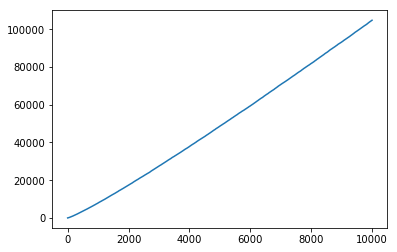

In [55]:
# The progress of primes
plt.plot(first_N_primes(10000))

In [4]:
first_N_primes(20)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

### All prime factors of N

In [20]:
def prime_factors(N):
    '''
    This function returns all prime factors of a given number N
    '''
    top = int(np.ceil(1+N/2))
    primes = prime_list(top)
    factors = filter(lambda x: N % x ==0, primes)
    if len(factors)==0:
        factors.append(N)
    return factors


In [24]:
print("Prime factors of 68: ", prime_factors(68))
print("Prime factors of 121: ", prime_factors(121))
print("Prime factors of 244: ", prime_factors(244))
print("Prime factors of 720: ", prime_factors(720))
print("Prime factors of 18675: ", prime_factors(18675))

Prime factors of 68:  [2, 17]
Prime factors of 121:  [11]
Prime factors of 244:  [2, 61]
Prime factors of 720:  [2, 3, 5]
Prime factors of 18675:  [3, 5, 83]


### Prime factorization
***
$$ N = 2^a 3^b..$$

In [25]:
def prime_factorization(N):
    '''
    Find the prime factorization in power of primes.
    ---
    Returns a list of tuples like (2,a), (3,b), ... 
    '''
    prime_fact = prime_factors(N)
    fact_pow = []
    
    rem = N
    for p in prime_fact:
        a=0
        while rem % p == 0:
            a += 1
            rem = rem / p
        fact_pow.append((p,a))
    return fact_pow
    

In [26]:
prime_factorization(10241)

[(7, 2), (11, 1), (19, 1)]

In [7]:
def factorial(n):
    if n==0:
        return 1
    else:
        return n*factorial(n-1)

In [10]:
factorial(10)

3628800

In [68]:
prime_factorization(factorial(9))

[(2, 7), (3, 4), (5, 1), (7, 1)]

In [ ]:
# All the primes having n digits
def primes_n_digits():
    pass



### Mersenne Prime
***
Primes that could be written form $2^n-1$ for example 3, 7, 31, 127. It si easy to show that if $2^n - 1$ is a prime then so is $n$. The converse of the statemetn is not true, eg., $2^{11} - 1 =2017$ is not prime, even though 11 is.

**Lucas–Lehmer Primality Test**: Most efficient test for Mercenne Primes
First we start with $n=0$, $a_0 = 4$. 
Then $a_n = a_{n-1}^1 - 2$ and  
The number $2^k - 1$ is a prime if $a_{k-2} \equiv = 0$(mod $2^k - 1$) is true.
***
Source: 
- https://brilliant.org/wiki/mersenne-prime/
- https://primes.utm.edu/mersenne/index.html#known